In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv('user_data.csv')
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [3]:
logs = pd.read_csv('logs.csv')
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


   Размер таблиц user_data и logs

In [4]:
user_data.shape

(2954, 3)

In [5]:
logs.shape

(4500, 4)

   Типы переменных таблиц user_data и logs

In [6]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

   Проверка на наличие пропущенных значений в таблицах user_data и logs

In [8]:
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [9]:
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

   Описательная статистика для таблиц user_data и logs

In [10]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [11]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


   Сколько уникальных значений принимает переменная platform?

In [12]:
logs.platform.nunique()

3

   Какой клиент совершил больше всего успешных операций?

In [13]:
client_success = logs.query('success == True')\
                     .groupby('client', as_index = False)\
                     .agg({'success': 'count'}).rename(columns ={'client':'client','success':'count_success'})\
                     .sort_values(by = 'count_success', ascending =False)

client_success.head(11)

,client,count_success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


   **Вывод:** Клиенты 12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584  совершили больше всего успешных операций

   С какой платформы было совершено наибольшее количество успешных операций?

In [14]:
max_success_platform = logs.query('success == True').groupby('platform', as_index = False)\
                           .agg({'success' : 'count'})\
                           .rename(columns = {'success':'success_count'})\
                           .sort_values(by = 'success_count', ascending = False)
max_success_platform

,platform,success_count
1,phone,2019
0,computer,1090
2,tablet,180


   **Вывод:** Hаибольшее количество успешных операций совершено с платформы phone

   Какая платформа наиболее популярна среди премиумных клиентов?

In [15]:
# Объединяем две таблицы user_data и logs

union_data = user_data.merge(logs, how = 'inner')
union_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [16]:
popular_platform_premium = union_data.query('premium == True')\
                           .groupby('platform', as_index = False)\
                           .agg({'premium' : 'count'})\
                           .rename(columns ={'premium' : 'count'})\
                           .sort_values(by = 'count', ascending = False)
popular_platform_premium

,platform,count
1,phone,246
0,computer,150
2,tablet,24


   **Вывод:** Наиболее популярна среди премиумных клиентов - phone

**Визуализация распределения возраста клиентов в зависимости от типа клиента (премиум или нет)**

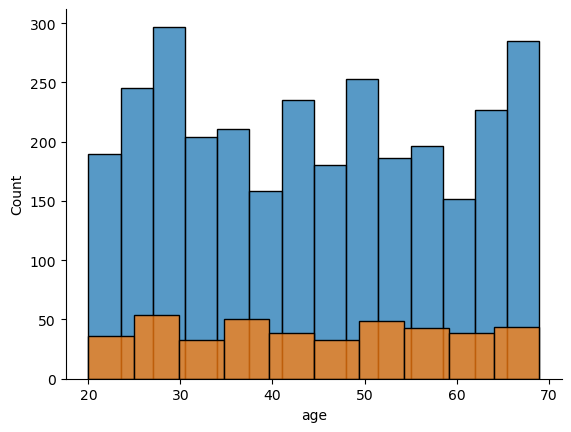

In [66]:
sns.histplot(union_data.query('premium == False').age)
sns.histplot(union_data.query('premium == True').age)
sns.despine()

**График распределения числа успешных операций:**

x – число успешных операций, 
y – число клиентов, совершивших такое количество успешных операций

In [70]:
client_success_number = union_data.groupby('client').agg({'success' : 'sum'})

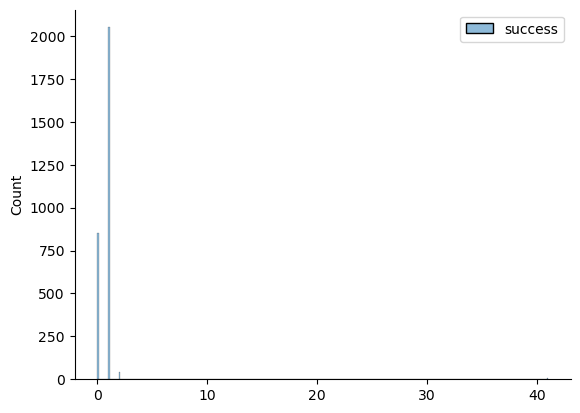

In [68]:
sns.histplot(client_success_number, kde = False)
sns.despine()

In [65]:
client_success_number.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

**Выводы:**
1. Большая часть наблюдений сосредоточена в левой части графика
2. Несколько клиентов совершили более 40 успешных действий

**Визуализация числа успешных операций, сделанных на платформе computer, в зависимости от возраста.**

   По оси x – возраст, по оси y – число успешных операций.
   Клиенты какого возраста совершили наибольшее количество успешных действий?

In [118]:
age_computer_success_number = union_data.query('platform == "computer"')\
                             .groupby('age', as_index = False)\
                             .agg({'success' : 'sum'})\
                            .sort_values(by = 'success', ascending = False)
age_computer_success_number.head()

,age,success
8,28,49
29,49,33
5,25,33
12,32,27
48,68,26


<Axes: xlabel='age', ylabel='success'>

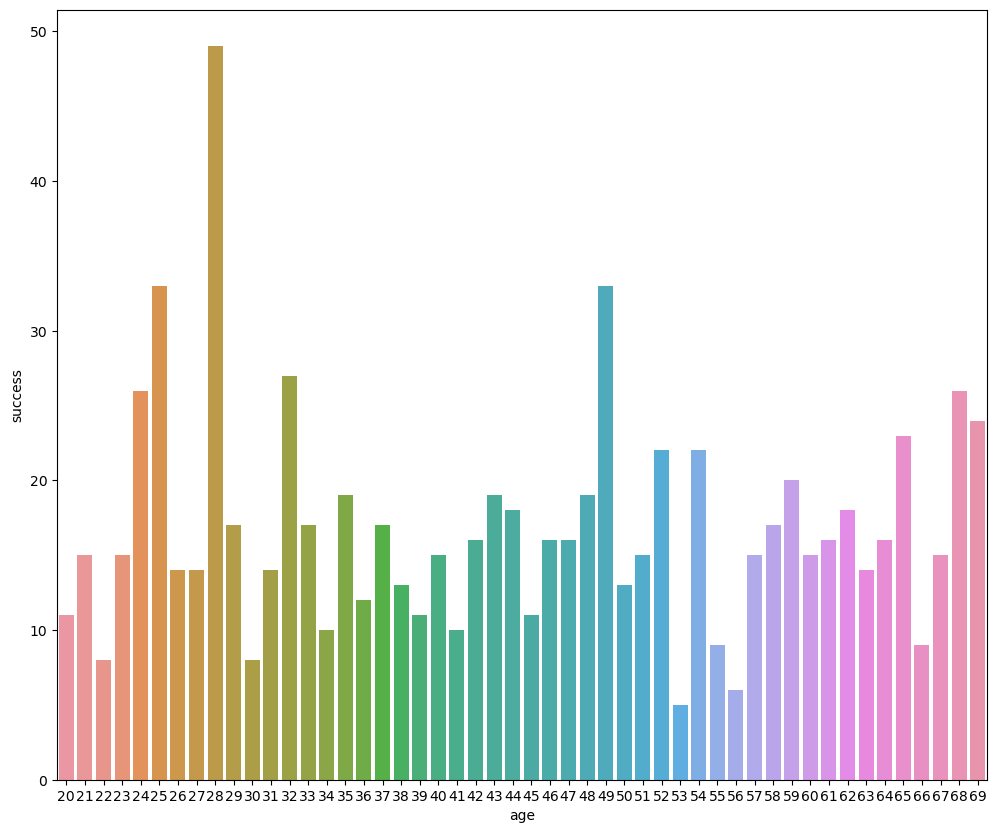

In [119]:
plt.figure(figsize=(12, 10))
sns.barplot(x ='age', y = 'success', data = age_computer_success_number)

                             Наибольшее количество успешных действий совершили клиенты возрастом 28 лет